In [ ]:
from pathlib import Path


data_dir = Path("C:\\Users\\konno\\SynologyDrive\\datasciense\\projects_foler\\1_kaggle\\CMI\\cmi-detect-behavior-with-sensor-data")

In [3]:
!ls -l {data_dir}

'ls' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


In [4]:
NUMERIC_COLUMNS = [
    "acc_x",
    "acc_y",
    "acc_z",
    "rot_w",
    "rot_x",
    "rot_y",
    "rot_z",
    *[f"thm_{i}" for i in range(1, 6)],
    *[f"tof_{i}_v{j}" for i in range(1, 6) for j in range(64)],
]

In [5]:
import polars as pl

train_df = pl.read_csv(data_dir / "train.csv").with_columns(
    pl.col(c).replace(-1, None) for c in NUMERIC_COLUMNS if c.startswith("tof_")
)
train_df.head()

row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,thm_2,thm_3,thm_4,thm_5,tof_1_v0,tof_1_v1,tof_1_v2,tof_1_v3,tof_1_v4,tof_1_v5,tof_1_v6,tof_1_v7,tof_1_v8,tof_1_v9,tof_1_v10,tof_1_v11,tof_1_v12,tof_1_v13,tof_1_v14,tof_1_v15,…,tof_5_v27,tof_5_v28,tof_5_v29,tof_5_v30,tof_5_v31,tof_5_v32,tof_5_v33,tof_5_v34,tof_5_v35,tof_5_v36,tof_5_v37,tof_5_v38,tof_5_v39,tof_5_v40,tof_5_v41,tof_5_v42,tof_5_v43,tof_5_v44,tof_5_v45,tof_5_v46,tof_5_v47,tof_5_v48,tof_5_v49,tof_5_v50,tof_5_v51,tof_5_v52,tof_5_v53,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
str,str,str,i64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""SEQ_000007_000000""","""Target""","""SEQ_000007""",0,"""SUBJ_059520""","""Seated Lean Non Dom - FACE DOW…","""Relaxes and moves hand to targ…","""Transition""","""Cheek - pinch skin""",6.683594,6.214844,3.355469,0.134399,-0.355164,-0.447327,-0.809753,28.943842,31.822186,29.553024,28.592863,28.310535,131.0,134.0,132.0,135.0,98.0,74.0,64.0,60.0,null,null,152.0,153.0,141.0,89.0,68.0,63.0,…,153.0,133.0,131.0,121.0,118.0,134.0,134.0,128.0,121.0,119.0,121.0,129.0,null,113.0,124.0,122.0,131.0,null,null,null,null,120.0,127.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""SEQ_000007_000001""","""Target""","""SEQ_000007""",1,"""SUBJ_059520""","""Seated Lean Non Dom - FACE DOW…","""Relaxes and moves hand to targ…","""Transition""","""Cheek - pinch skin""",6.949219,6.214844,3.125,0.143494,-0.340271,-0.42865,-0.824524,29.340816,31.874645,29.79174,28.663383,28.406172,130.0,138.0,131.0,135.0,101.0,76.0,66.0,61.0,null,null,156.0,155.0,141.0,93.0,74.0,64.0,…,157.0,139.0,127.0,126.0,121.0,136.0,142.0,133.0,127.0,123.0,127.0,134.0,null,116.0,122.0,123.0,126.0,null,null,null,null,122.0,129.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""SEQ_000007_000002""","""Target""","""SEQ_000007""",2,"""SUBJ_059520""","""Seated Lean Non Dom - FACE DOW…","""Relaxes and moves hand to targ…","""Transition""","""Cheek - pinch skin""",5.722656,5.410156,5.421875,0.219055,-0.274231,-0.356934,-0.865662,30.339359,30.935045,30.090014,28.796087,28.529778,137.0,136.0,147.0,109.0,90.0,81.0,74.0,74.0,null,164.0,165.0,146.0,106.0,94.0,77.0,77.0,…,null,null,151.0,138.0,127.0,151.0,187.0,null,156.0,136.0,135.0,134.0,null,133.0,142.0,131.0,130.0,132.0,136.0,null,null,112.0,121.0,123.0,125.0,null,null,null,null,112.0,119.0,null,null,null,null,null,null
"""SEQ_000007_000003""","""Target""","""SEQ_000007""",3,"""SUBJ_059520""","""Seated Lean Non Dom - FACE DOW…","""Relaxes and moves hand to targ…","""Transition""","""Cheek - pinch skin""",6.6015625,3.53125,6.457031,0.297546,-0.26416,-0.238159,-0.885986,30.54373,27.044001,29.310717,29.018711,27.40201,143.0,147.0,170.0,127.0,109.0,98.0,95.0,95.0,null,177.0,189.0,177.0,136.0,121.0,107.0,104.0,…,null,149.0,142.0,135.0,null,159.0,181.0,150.0,135.0,129.0,139.0,null,null,141.0,136.0,120.0,122.0,132.0,null,null,null,107.0,112.0,115.0,140.0,null,null,null,null,101.0,111.0,null,null,null,null,null,null
"""SEQ_000007_000004""","""Target""","""SEQ_000007""",4,"""SUBJ_059520""","""Seated Lean Non Dom - FACE DOW…","""Relaxes and moves hand to targ…","""Transition""","""Cheek - pinch skin""",5.566406,0.277344,9.6328125,0.333557,-0.218628,-0.063538,-0.914856,29.317265,25.270855,26.808746,29.408604,27.357603,178.0,191.0,183.0,157.0,146.0,139.0,143.0,148.0,null,null,236.0,238.0,208.0,200.0,185.0,190.0,…,212.0,181.0,null,null,null,184.0,null,179.0,162.0,null,null,null,null,169.0,171.0,145.0,140.0,null,null,null,null,132.0,125.0,131.0,null,null,null,null,null,101.0,109.0,125.0,null,null,null,null,null


In [6]:
print(train_df.columns)

['row_id', 'sequence_type', 'sequence_id', 'sequence_counter', 'subject', 'orientation', 'behavior', 'phase', 'gesture', 'acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5', 'tof_1_v0', 'tof_1_v1', 'tof_1_v2', 'tof_1_v3', 'tof_1_v4', 'tof_1_v5', 'tof_1_v6', 'tof_1_v7', 'tof_1_v8', 'tof_1_v9', 'tof_1_v10', 'tof_1_v11', 'tof_1_v12', 'tof_1_v13', 'tof_1_v14', 'tof_1_v15', 'tof_1_v16', 'tof_1_v17', 'tof_1_v18', 'tof_1_v19', 'tof_1_v20', 'tof_1_v21', 'tof_1_v22', 'tof_1_v23', 'tof_1_v24', 'tof_1_v25', 'tof_1_v26', 'tof_1_v27', 'tof_1_v28', 'tof_1_v29', 'tof_1_v30', 'tof_1_v31', 'tof_1_v32', 'tof_1_v33', 'tof_1_v34', 'tof_1_v35', 'tof_1_v36', 'tof_1_v37', 'tof_1_v38', 'tof_1_v39', 'tof_1_v40', 'tof_1_v41', 'tof_1_v42', 'tof_1_v43', 'tof_1_v44', 'tof_1_v45', 'tof_1_v46', 'tof_1_v47', 'tof_1_v48', 'tof_1_v49', 'tof_1_v50', 'tof_1_v51', 'tof_1_v52', 'tof_1_v53', 'tof_1_v54', 'tof_1_v55', 'tof_1_v56', 'tof_1_v57', 'tof_1_v58', 'tof_1_v59', '

In [7]:
train_df["subject"].n_unique()

81

In [8]:
train_df["sequence_id"].n_unique()

8151

In [10]:
train_df.shape

(574945, 341)

In [9]:
train_df["gesture"].n_unique()

18

<Axes: title={'center': 'Number of Unique Sequences per Subject'}, xlabel='Subject', ylabel='Unique Sequences'>

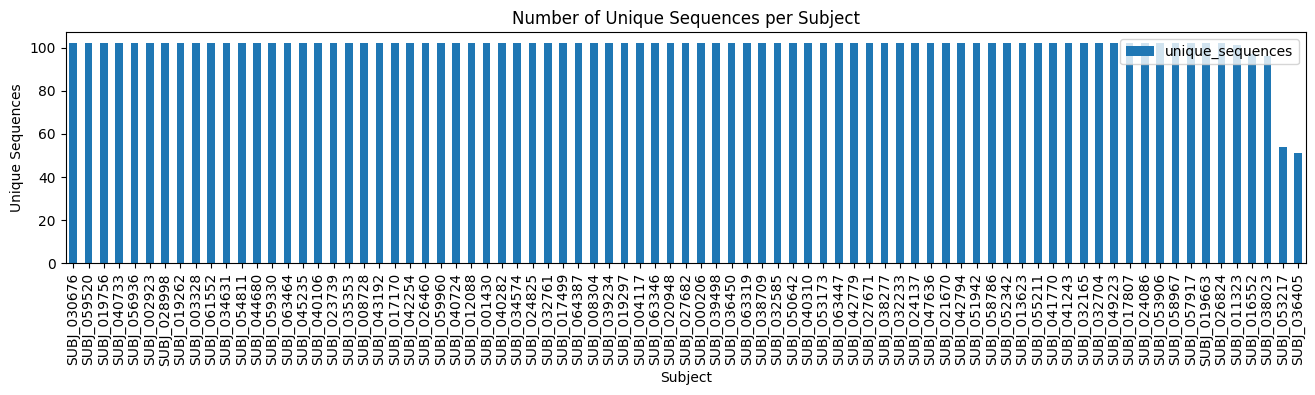

In [11]:
train_df.group_by("subject").agg(
    pl.col("sequence_id").n_unique().alias("unique_sequences")
).sort("unique_sequences", descending=True).to_pandas().plot(
    kind="bar",
    x="subject",
    y="unique_sequences",
    title="Number of Unique Sequences per Subject",
    xlabel="Subject",
    ylabel="Unique Sequences",
    figsize=(16, 3),
)

<Axes: title={'center': 'Distribution of Unique Sequence Counters'}, xlabel='Unique Sequence Counters', ylabel='Frequency'>

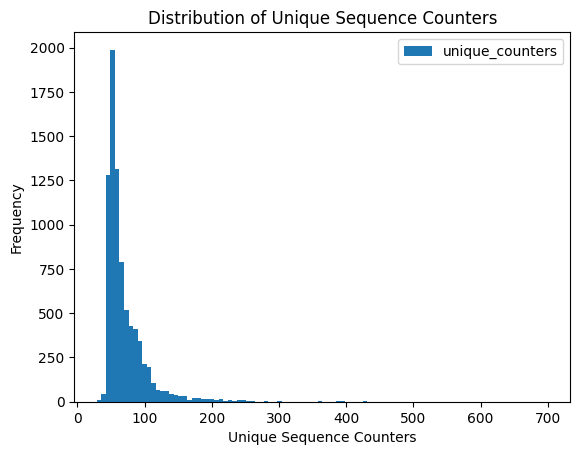

In [12]:
train_df.group_by("sequence_id").agg(
    pl.col("sequence_counter").n_unique().alias("unique_counters")
).sort("unique_counters", descending=True).to_pandas().plot(
    kind="hist", bins=100,
    title="Distribution of Unique Sequence Counters",
    xlabel="Unique Sequence Counters",
    ylabel="Frequency",
)

<Axes: title={'center': 'Number of Unique Sequence Counters per Phase'}, xlabel='Phase', ylabel='Unique Sequence Counters'>

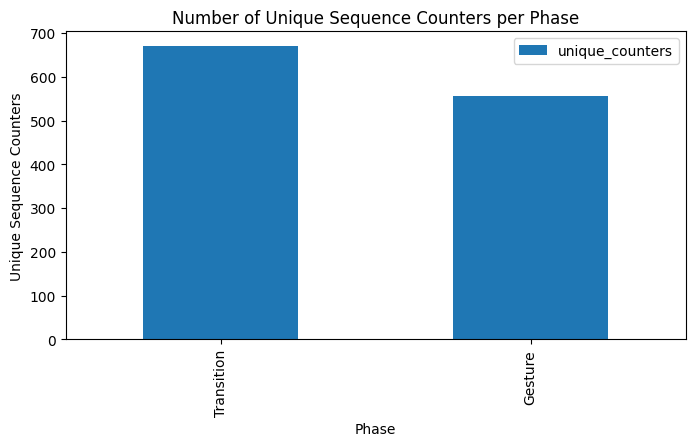

In [13]:
train_df.group_by("phase").agg(
    pl.col("sequence_counter").n_unique().alias("unique_counters")
).sort("unique_counters", descending=True).to_pandas().plot(
    kind="bar",
    x="phase",
    y="unique_counters",
    title="Number of Unique Sequence Counters per Phase",
    xlabel="Phase",
    ylabel="Unique Sequence Counters",
    figsize=(8, 4),
)

In [14]:
GESTURES = sorted(train_df["gesture"].unique().to_list())
GESTURES

['Above ear - pull hair',
 'Cheek - pinch skin',
 'Drink from bottle/cup',
 'Eyebrow - pull hair',
 'Eyelash - pull hair',
 'Feel around in tray and pull out an object',
 'Forehead - pull hairline',
 'Forehead - scratch',
 'Glasses on/off',
 'Neck - pinch skin',
 'Neck - scratch',
 'Pinch knee/leg skin',
 'Pull air toward your face',
 'Scratch knee/leg skin',
 'Text on phone',
 'Wave hello',
 'Write name in air',
 'Write name on leg']

In [15]:
PHASES = sorted(train_df["phase"].unique().to_list())
PHASES

['Gesture', 'Transition']

In [16]:
BEHAVIORS = sorted(train_df["behavior"].unique().to_list())
BEHAVIORS

['Hand at target location',
 'Moves hand to target location',
 'Performs gesture',
 'Relaxes and moves hand to target location']

In [17]:
ORIENTATIONS = sorted(train_df["orientation"].unique().to_list())
ORIENTATIONS

['Lie on Back',
 'Lie on Side - Non Dominant',
 'Seated Lean Non Dom - FACE DOWN',
 'Seated Straight']

In [18]:
train_df.group_by("sequence_id").agg(pl.col("sequence_type").first()).group_by(
    "sequence_type"
).agg(pl.len().alias("count")).sort("count", descending=True)

sequence_type,count
str,u32
"""Target""",5113
"""Non-Target""",3038


In [19]:
cols = train_df.columns
df = train_df.group_by("sequence_id").agg(
    *[pl.all().n_unique()] + [pl.col("sequence_counter").len().alias("seq_len")]
)
display(df)

per_sequence_cols = []
for col  in cols:
    if col not in ["sequence_id", "sequence_counter"]:
        if (df[col] == 1).all():
            per_sequence_cols.append(col)

print("Columns with only one unique value per sequence:")
for col in per_sequence_cols:
    print(f"- {col}")

sequence_id,row_id,sequence_type,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,thm_2,thm_3,thm_4,thm_5,tof_1_v0,tof_1_v1,tof_1_v2,tof_1_v3,tof_1_v4,tof_1_v5,tof_1_v6,tof_1_v7,tof_1_v8,tof_1_v9,tof_1_v10,tof_1_v11,tof_1_v12,tof_1_v13,tof_1_v14,tof_1_v15,…,tof_5_v28,tof_5_v29,tof_5_v30,tof_5_v31,tof_5_v32,tof_5_v33,tof_5_v34,tof_5_v35,tof_5_v36,tof_5_v37,tof_5_v38,tof_5_v39,tof_5_v40,tof_5_v41,tof_5_v42,tof_5_v43,tof_5_v44,tof_5_v45,tof_5_v46,tof_5_v47,tof_5_v48,tof_5_v49,tof_5_v50,tof_5_v51,tof_5_v52,tof_5_v53,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63,seq_len
str,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
"""SEQ_028332""",55,1,55,1,1,3,2,1,34,40,43,55,52,49,55,51,51,51,50,52,2,2,3,13,4,2,2,3,2,2,2,3,2,2,2,3,…,10,7,8,9,2,3,10,8,7,9,8,7,3,2,9,10,9,8,9,10,3,3,6,9,8,7,8,8,3,1,2,8,9,8,7,8,55
"""SEQ_044893""",75,1,75,1,1,3,2,1,59,47,59,73,75,73,73,68,72,68,75,72,21,28,25,36,29,28,25,25,17,35,24,32,29,28,27,25,…,1,1,12,1,1,13,1,11,6,11,1,1,10,10,9,9,8,8,1,1,8,8,6,7,6,8,1,1,6,6,4,4,3,1,1,1,75
"""SEQ_037666""",61,1,61,1,1,3,2,1,52,40,51,60,61,60,61,57,60,59,57,60,26,30,33,32,35,26,16,20,29,35,30,27,20,14,9,13,…,35,38,34,19,31,32,36,28,30,32,36,14,29,30,38,27,31,35,21,12,30,30,38,33,31,22,13,8,34,37,22,14,15,13,9,6,61
"""SEQ_039776""",69,1,69,1,1,3,2,1,51,41,47,69,68,68,66,68,67,67,67,61,27,24,25,26,20,34,46,52,25,25,28,26,24,24,27,43,…,14,13,14,12,20,13,15,16,14,14,14,12,21,18,14,17,17,15,12,12,13,17,16,15,14,12,12,13,18,20,15,13,12,13,12,12,69
"""SEQ_041588""",98,1,98,1,1,3,2,1,70,68,74,94,96,98,97,95,98,97,82,94,46,53,57,52,56,46,41,34,59,49,46,35,34,25,15,14,…,24,28,30,26,47,48,49,32,21,16,32,31,50,45,37,38,21,27,29,27,43,36,42,42,31,42,28,25,45,43,45,46,40,50,42,41,98
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""SEQ_042741""",61,1,61,1,1,3,2,1,40,30,41,60,60,58,61,60,60,60,57,60,20,18,13,12,8,11,6,8,22,20,18,16,11,12,7,5,…,21,20,17,9,22,21,23,22,20,18,19,11,22,24,25,23,19,20,19,11,20,21,25,22,16,20,16,8,22,19,19,20,20,16,11,9,61
"""SEQ_010887""",81,1,81,1,1,3,2,1,72,61,67,80,80,80,81,79,74,80,80,77,5,8,13,17,18,23,20,19,12,6,3,5,10,13,7,13,…,31,26,29,26,7,4,33,29,26,28,27,27,5,19,34,30,28,27,21,23,6,26,30,30,24,25,28,18,6,21,29,25,23,24,21,17,81
"""SEQ_063252""",80,1,80,1,1,3,2,1,60,43,57,77,76,78,78,79,79,78,77,74,44,39,36,35,35,29,31,34,32,41,31,28,29,29,32,33,…,27,36,44,39,45,19,18,23,26,37,46,33,45,27,22,32,28,37,40,36,39,39,33,33,28,42,36,37,42,34,33,33,29,43,41,25,80


Columns with only one unique value per sequence:
- sequence_type
- subject
- orientation
- gesture


In [20]:
def sanitize_col_name(s):
    return s.lower().replace(" ", "_")


sequence_meta_df = (
    train_df.group_by("sequence_id", maintain_order=True)
    .agg(
        *[
            pl.col(c).first()
            for c in [
                "sequence_type",
                "subject",
                "orientation",
                "gesture",
            ]
        ]
        + [
            pl.col("phase").n_unique().alias("diversity_phase"),
            pl.col("behavior").n_unique().alias("diversity_behavior"),
        ]
        + [
            pl.col("sequence_counter").len().alias("seq_len"),
            *[
                (pl.col("phase") == p)
                .sum()
                .alias(f"count_phase_{sanitize_col_name(p)}")
                for p in PHASES
            ],
            *[
                (pl.col("behavior") == b)
                .sum()
                .alias(f"count_behavior_{sanitize_col_name(b)}")
                for b in BEHAVIORS
            ],
        ]
    )
    .with_columns(
        [
            *[
                (
                    pl.col(f"count_phase_{sanitize_col_name(p)}") / pl.col("seq_len")
                ).alias(f"ratio_phase_{sanitize_col_name(p)}")
                for p in PHASES
            ],
            *[
                (
                    pl.col(f"count_behavior_{sanitize_col_name(b)}") / pl.col("seq_len")
                ).alias(f"ratio_behavior_{sanitize_col_name(b)}")
                for b in BEHAVIORS
            ],
        ]
    )
)
print(sequence_meta_df.height)
sequence_meta_df.head()

8151


sequence_id,sequence_type,subject,orientation,gesture,diversity_phase,diversity_behavior,seq_len,count_phase_gesture,count_phase_transition,count_behavior_hand_at_target_location,count_behavior_moves_hand_to_target_location,count_behavior_performs_gesture,count_behavior_relaxes_and_moves_hand_to_target_location,ratio_phase_gesture,ratio_phase_transition,ratio_behavior_hand_at_target_location,ratio_behavior_moves_hand_to_target_location,ratio_behavior_performs_gesture,ratio_behavior_relaxes_and_moves_hand_to_target_location
str,str,str,str,str,u32,u32,u32,u32,u32,u32,u32,u32,u32,f64,f64,f64,f64,f64,f64
"""SEQ_000007""","""Target""","""SUBJ_059520""","""Seated Lean Non Dom - FACE DOW…","""Cheek - pinch skin""",2,3,57,32,25,7,0,32,18,0.561404,0.438596,0.122807,0.0,0.561404,0.315789
"""SEQ_000008""","""Target""","""SUBJ_020948""","""Seated Lean Non Dom - FACE DOW…","""Forehead - pull hairline""",2,3,68,33,35,12,23,33,0,0.485294,0.514706,0.176471,0.338235,0.485294,0.0
"""SEQ_000013""","""Target""","""SUBJ_040282""","""Lie on Side - Non Dominant""","""Cheek - pinch skin""",2,3,53,30,23,8,0,30,15,0.566038,0.433962,0.150943,0.0,0.566038,0.283019
"""SEQ_000016""","""Non-Target""","""SUBJ_052342""","""Seated Lean Non Dom - FACE DOW…","""Write name on leg""",2,3,61,34,27,9,0,34,18,0.557377,0.442623,0.147541,0.0,0.557377,0.295082
"""SEQ_000018""","""Target""","""SUBJ_032165""","""Seated Lean Non Dom - FACE DOW…","""Forehead - pull hairline""",2,3,54,34,20,5,0,34,15,0.62963,0.37037,0.092593,0.0,0.62963,0.277778


In [ ]:
sequence_meta_df.columns

In [ ]:
sequence_meta_df.filter(pl.col("ratio_behavior_moves_hand_to_target_location") == 0).height

In [ ]:
sequence_meta_df.filter(pl.col("ratio_behavior_relaxes_and_moves_hand_to_target_location") == 0).height

In [ ]:
sequence_meta_df.filter(
    (pl.col("ratio_behavior_moves_hand_to_target_location") == 0)
    & (pl.col("ratio_behavior_relaxes_and_moves_hand_to_target_location") == 0)
).height

In [ ]:
target_sequence_meta_df = sequence_meta_df.filter(pl.col("sequence_type") == "Target")
non_target_sequence_meta_df = sequence_meta_df.filter(
    pl.col("sequence_type") == "Non-Target"
)

In [ ]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
target_sequence_meta_df["gesture"].value_counts().sort("count", descending=True).to_pandas().plot(
    kind="barh",
    x="gesture",
    y="count",
    title="Gesture Counts (Target)",
    xlabel="Gesture",
    ylabel="Count",
    figsize=(8, 4),
    ax=ax,
    color="blue",
    alpha=0.7,
    label="Target",
)
_, ax = plt.subplots()
non_target_sequence_meta_df["gesture"].value_counts().sort("count", descending=True).to_pandas().plot(
    kind="barh",
    x="gesture",
    y="count",
    title="Gesture Counts (Non-Target)",
    xlabel="Gesture",
    ylabel="Count",
    figsize=(8, 4),
    ax=ax,
    color="orange",
    alpha=0.7,
    label="Non-Target",
)

In [ ]:
sequence_meta_df["diversity_behavior"].value_counts().sort("count", descending=True)

In [ ]:
sequence_meta_df.filter(pl.col("diversity_behavior") == 2)

In [ ]:
sequence_meta_df["diversity_phase"].value_counts().sort("count", descending=True)

In [ ]:
sequence_meta_df.filter(pl.col("diversity_phase") == 1)

In [ ]:
(sequence_meta_df["count_phase_gesture"] / sequence_meta_df["seq_len"]).to_pandas().plot(
    kind="hist", bins=100,
    title="Distribution of Gesture Phase Count per Sequence Length",
    xlabel="Gesture Phase Ratio",
    ylabel="Frequency",
)

In [ ]:
sequence_meta_df.columns

In [ ]:
import matplotlib.pyplot as plt

for b in BEHAVIORS:
    _, ax = plt.subplots()
    for seq_type, df in zip(
        ["Target", "Non-Target"], [target_sequence_meta_df, non_target_sequence_meta_df]
    ):
        (df[f"count_behavior_{sanitize_col_name(b)}"] / df["seq_len"]).to_pandas().plot(
            kind="hist",
            bins=100,
            title=f"Distribution of `{b}`",
            xlabel="Behavior Ratio",
            ylabel="Frequency",
            alpha=0.5,
            ax=ax,
            xlim=(0, 1),
            label=seq_type,
            color="blue" if seq_type == "Target" else "orange",
            legend=True,
        )

In [ ]:
import matplotlib.pyplot as plt

b1, b2 = "Moves Hand to Target Location", "Relaxes and Moves Hand to Target Location"
_, ax = plt.subplots()
for seq_type, df in zip(
    ["Target", "Non-Target"], [target_sequence_meta_df, non_target_sequence_meta_df]
):
    (
        (
            df[f"count_behavior_{sanitize_col_name(b1)}"]
            + df[f"count_behavior_{sanitize_col_name(b2)}"]
        )
        / df["seq_len"]
    ).to_pandas().plot(
        kind="hist",
        bins=100,
        title=f"Distribution of `{b1}` and `{b2}` Combined",
        xlabel="Behavior Ratio",
        ylabel="Frequency",
        alpha=0.5,
        ax=ax,
        xlim=(0, 1),
        label=seq_type,
        color="blue" if seq_type == "Target" else "orange",
        legend=True,
    )

In [ ]:
train_df["behavior"].unique().to_list()

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.collections import LineCollection
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.transform import Rotation as R, Slerp


def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size) / window_size, mode="same")


def visualize_tof(tof1, tof2, tof3, tof4, tof5, x_gesture, behavior_dict):
    for name, x in zip(
        ["tof1", "tof2", "tof3", "tof4", "tof5"], [tof1, tof2, tof3, tof4, tof5]
    ):
        x = x.copy()
        x = x.reshape(-1, 64)
        fig, ax = plt.subplots(figsize=(8, 3))
        x_max = np.nanmax(x)
        x_min = np.nanmin(x)

        colors = plt.cm.magma(np.linspace(0, 1, x.shape[1]))
        for i in range(x.shape[1]):
            ax.plot(
                x[:, i],
                color=colors[i],
                alpha=0.3,
                linewidth=0.5,
            )

        ax.plot(
            x_gesture * (x_max - x_min) + x_min,
            color="red",
            alpha=0.7,
            linewidth=2,
            label="Gesture Phase",
        )

        colors = ["blue", "orange", "green", "purple", "brown"]
        for i, b in enumerate(BEHAVIORS):
            ax.plot(
                behavior_dict[b] * (x_max - x_min) + x_min,
                label=f"Behavior: {b}",
                linewidth=1,
                alpha=0.7,
                color=colors[i % len(colors)],
                linestyle="--",
            )
        ax.set(
            title=f"{name}",
            xlabel="Sequence Counter",
            ylabel="Value",
        )
        ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.show()


def visualize_sensor(acc, acc_world, rot, thm, x_gesture, behavior_dict):
    for name, x, channel_names in zip(
        ["acc_sensor", "acc_world", "rot", "trm"],
        [acc, acc_world, rot, thm],
        [
            ["acc_x", "acc_y", "acc_z"],
            ["acc_x", "acc_y", "acc_z"],
            ["rot_x", "rot_y", "rot_z", "rot_w"],
            [f"thm_{i}" for i in range(1, 6)],
        ],
    ):
        x = x.copy()
        fig, ax = plt.subplots(figsize=(8, 3))
        x_max = np.max(x)
        x_min = np.min(x)

        colors = ["blue", "orange", "green", "purple", "brown"]
        for i in range(x.shape[1]):
            ax.plot(
                x[:, i],
                color=colors[i % len(colors)],
                alpha=0.7,
                linewidth=0.5,
                label=channel_names[i],
            )

        ax.plot(
            x_gesture * (x_max - x_min) + x_min,
            color="red",
            alpha=0.7,
            linewidth=2,
            label="Gesture Phase",
        )
        for i, b in enumerate(BEHAVIORS):
            ax.plot(
                behavior_dict[b] * (x_max - x_min) + x_min,
                label=f"Behavior: {b}",
                linewidth=1,
                alpha=0.7,
                color=colors[i % len(colors)],
                linestyle="--",
            )
        ax.set(
            title=f"{name}",
            xlabel="Sequence Counter",
            ylabel="Value",
        )
        ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.show()


def plot_in_3d(x, title="3D Acceleration Trajectory", unit="m/s²"):
    n_samples = x.shape[0]

    # 線分生成（2点ごとのつなぎ）
    points = x.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # カラーマップ用の正規化
    norm = Normalize(vmin=0, vmax=n_samples - 1)
    colors = cm.viridis(norm(np.arange(n_samples - 1)))

    # 3D線分に色をつける
    lc = Line3DCollection(segments, colors=colors, linewidth=1)

    # 描画
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.add_collection3d(lc)
    # 軸設定
    ax.set_xlim(np.nanmin(x[:, 0]), np.nanmax(x[:, 0]))
    ax.set_ylim(np.nanmin(x[:, 1]), np.nanmax(x[:, 1]))
    ax.set_zlim(np.nanmin(x[:, 2]), np.nanmax(x[:, 2]))
    ax.set_xlabel(f"X ({unit})")
    ax.set_ylabel(f"Y ({unit})")
    ax.set_zlabel(f"Z ({unit}")
    ax.set_aspect("equal")
    ax.set_title(title)

    # カラーバー追加
    sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
    sm.set_array([])  # ダミーデータ（matplotlib仕様）
    cbar = fig.colorbar(sm, ax=ax, pad=0.1)
    cbar.set_label("Time step index")

    plt.show()


def plot_transparent_sphere(
    ax, center=(0, 0, 0), radius=1.0, color="cyan", alpha=0.3, resolution=100
):
    """
    半透明な球体を 3D プロットに描画する

    Parameters:
        ax        : matplotlib の 3D Axes オブジェクト
        center    : 球体の中心座標 (x, y, z)
        radius    : 球体の半径
        color     : 球体の色
        alpha     : 透明度（0.0〜1.0）
        resolution: 緯度・経度の分割数（細かさ）
    """
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)

    x = radius * np.outer(np.cos(u), np.sin(v)) + center[0]
    y = radius * np.outer(np.sin(u), np.sin(v)) + center[1]
    z = radius * np.outer(np.ones_like(u), np.cos(v)) + center[2]

    ax.plot_surface(x, y, z, color=color, alpha=alpha, edgecolor="none")


def plot_in_3d_with_vector(x, title="3D Acceleration Trajectory", step=10):
    n_samples = x.shape[0]

    # 線分生成（2点ごとのつなぎ）
    points = x.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # カラーマップ用の正規化
    norm = Normalize(vmin=0, vmax=n_samples - 1)
    colors = cm.viridis(norm(np.arange(n_samples - 1)))

    # 3D線分に色をつける
    lc = Line3DCollection(segments, colors=colors, linewidth=1)

    # 描画
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.add_collection3d(lc)

    for i in range(0, n_samples, step):
        # origin of arrow (e.g., can use acc[i] instead of (0,0,0) if preferred)
        origin = np.array([0, 0, 0])
        direction = x[i]
        ax.quiver(*origin, *direction, normalize=False, color="red", alpha=0.6)

    ax.scatter([0], [0], [0], color="red", s=50, label="Origin")
    plot_transparent_sphere(ax, center=(0, 0, 0), radius=1.0, color="cyan", alpha=0.1)

    # 軸設定
    ax.set(
        xlim=(-1, 1),
        ylim=(-1, 1),
        zlim=(-1, 1),
        xlabel="X",
        ylabel="Y",
        zlabel="Z",
        aspect="equal",
        title=title,
    )

    # カラーバー追加
    sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
    sm.set_array([])  # ダミーデータ（matplotlib仕様）
    cbar = fig.colorbar(sm, ax=ax, pad=0.1)
    cbar.set_label("Time step index")

    plt.show()


def compute_acc_world_with_slerp(acc_sensor, rot, delay_step=0, fill=np.nan):
    """
    Convert sensor acceleration to world coordinates, correcting for constant delay.

    Parameters:
        acc_sensor: (N, 3) array of acceleration in sensor coordinates
        rot: (M, 4) array of quaternions (x, y, z, w)
        delay_step: constant offset between acc_sensor and rotation (in steps)

    Returns:
        acc_world: (N, 3) array of acceleration in world coordinates
    """
    N = len(acc_sensor)
    M = len(rot)
    rot_times = np.arange(M)
    acc_times = np.arange(N) + delay_step

    # マスクして acc_times が rot_times の範囲内のものだけ残す
    valid_idx = (acc_times >= rot_times[0]) & (acc_times <= rot_times[-1])
    acc_times_valid = acc_times[valid_idx]
    acc_sensor_valid = acc_sensor[valid_idx]

    # 補間と回転適用
    rot_objs = R.from_quat(rot)  # shape: (M,)
    slerp = Slerp(rot_times, rot_objs)
    interp_rots = slerp(acc_times_valid)  # shape: (valid_N,)
    acc_world_valid = interp_rots.apply(acc_sensor_valid)

    # 出力配列を構築（NaNで初期化し、validな位置に結果を埋める）
    acc_world = np.full_like(acc_sensor, fill)
    acc_world[valid_idx] = acc_world_valid

    return acc_world


def visualize_sequence(train_df, sequence_id, delay_step=0):
    single_sequence = train_df.filter(pl.col("sequence_id") == sequence_id)

    display(
        single_sequence.select(
            ["sequence_id", "subject", "orientation", "gesture", "sequence_type"]
        )
        .head(1)
        .to_pandas()
        .T
    )

    tof1 = single_sequence.select(f"tof_1_v{i}" for i in range(64)).to_numpy()
    tof1 = tof1.reshape(-1, 8, 8)
    tof2 = single_sequence.select(f"tof_2_v{i}" for i in range(64)).to_numpy()
    tof2 = tof2.reshape(-1, 8, 8)
    tof3 = single_sequence.select(f"tof_3_v{i}" for i in range(64)).to_numpy()
    tof3 = tof3.reshape(-1, 8, 8)
    tof4 = single_sequence.select(f"tof_4_v{i}" for i in range(64)).to_numpy()
    tof4 = tof4.reshape(-1, 8, 8)
    tof5 = single_sequence.select(f"tof_5_v{i}" for i in range(64)).to_numpy()
    tof5 = tof5.reshape(-1, 8, 8)
    acc = single_sequence.select("acc_x", "acc_y", "acc_z").to_numpy()
    rot = single_sequence.select("rot_x", "rot_y", "rot_z", "rot_w").to_numpy()
    rot_norm = np.linalg.norm(rot, axis=1, keepdims=True)
    thm = single_sequence.select(f"thm_{i}" for i in range(1, 6)).to_numpy()
    print(f"rot_norm: mean={np.nanmean(rot_norm):.3f}, std={np.nanstd(rot_norm):.5f}")

    try:
        # convert sensor coord to world coord
        acc_world = compute_acc_world_with_slerp(acc, rot, delay_step=delay_step)
    except Exception as e:
        print(f"Error converting sensor coordinates to world coordinates: {e}")
        acc_world = np.zeros_like(acc)

    try:
        # convert sensor coord to world coord
        r = R.from_quat(rot)
        sensor_z = np.zeros_like(np.ones_like(acc))
        sensor_z[:, 2] = 1.0  # Assuming Z is the vertical axis
        world_z = compute_acc_world_with_slerp(sensor_z, rot)
    except Exception as e:
        print(f"Error converting sensor Z coordinates to world coordinates: {e}")
        world_z = np.zeros_like(np.ones_like(acc))
        world_z[:, 2] = 1.0  # Default to Z-axis

    x_gesture = (single_sequence["phase"] == "Gesture").to_numpy().astype(np.float32)
    gestures_start_index = np.where(x_gesture == 1)[0][0]
    hand_at_target_index = np.where(
        single_sequence["behavior"] == "Hand at target location"
    )[0][0]

    print(f"Hand at target index: {hand_at_target_index}")
    print(f"Gesture start index: {gestures_start_index}")
    behavior_dict = {}

    for b in BEHAVIORS:
        behavior_dict[b] = (
            (single_sequence["behavior"] == b).to_numpy().astype(np.float32)
        )

    print(f"{tof1.shape=}")
    print(f"{tof2.shape=}")
    print(f"{tof3.shape=}")
    print(f"{tof4.shape=}")
    print(f"{tof5.shape=}")
    print(f"{acc.shape=}")
    print(f"{rot.shape=}")
    print(f"{thm.shape=}")

    gravity = np.array([0, 0, 9.81])

    visualize_sensor(acc, acc_world, rot, thm, x_gesture, behavior_dict)
    plot_in_3d(
        acc,
        title="Acceleration Trajectory (Sensor Coordinates)",
    )
    plot_in_3d(
        acc_world - gravity,
        title="Acceleration Trajectory (World Coordinates, Gravity Subtracted)",
    )
    plot_in_3d(
        (acc_world - gravity)[hand_at_target_index:],
        title="Acceleration Trajectory After Moved to the Target Location (World Coordinates, Gravity Subtracted)",
    )
    plot_in_3d_with_vector(world_z, title="Z Trajectory (World Coordinates)")
    plot_in_3d_with_vector(
        world_z[hand_at_target_index:],
        title="Z Trajectory After Moved to the Target Location (World Coordinates)",
    )
    visualize_tof(tof1, tof2, tof3, tof4, tof5, x_gesture, behavior_dict)

In [ ]:
for i, g in enumerate(BEHAVIORS):
    print(f"{i}: {g}")

gesture_to_type = {
    d["gesture"]: d["sequence_type"]
    for d in train_df.group_by("gesture")
    .agg(pl.col("sequence_type").eq("Target").first())
    .sort("sequence_type", "gesture")
    .to_dicts()
}

for i, (k, v) in enumerate(gesture_to_type.items()):
    tag = "🚨" if v else "✅"
    print(f"{tag} {i}: {k}: {v}")

In [ ]:
from IPython.display import Markdown

for i, (gesture, is_target) in enumerate(gesture_to_type.items()):
    sequence_id = sequence_meta_df.filter(pl.col("gesture") == gesture).sample(
        1, seed=2, with_replacement=False
    )["sequence_id"][0]
    tag = "🚨" if is_target else "✅"
    display(Markdown(f"### {tag} {i}: {gesture=}, {sequence_id=}"))
    visualize_sequence(train_df, sequence_id, delay_step=0)